In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime as dt
import xarray as xr


In [3]:
filename_goes_sst = 'F:/data/cruise_data/saildrone/baja-2018/other_format_shared_data/goes_sst_collocation_data.npy'
gsst = np.load(filename_goes_sst)    
filename_loggers_out_nc='f:/data/cruise_data/saildrone/baja-2018/saildrone-gen_4-baja_2018-sd1002-20180411T180000-20180611T055959-1_minutes-v1_withloggers.nc'
ds=xr.open_dataset(filename_loggers_out_nc)


In [4]:
skin=ds.TEMP_IR_UNCOR_MEAN[0,:].values
tair=ds.TEMP_AIR_MEAN[0,:].values
bulk1=ds.TEMP_CTD_MEAN[0,:].values
bulk2=ds.TEMP_O2_MEAN[0,:].values
uspd=ds.UWND_MEAN[0,:].values
vspd=ds.VWND_MEAN[0,:].values
wspd=(uspd**2+vspd**2)**.5
tdim=len(wspd)
tem_date=[0]*tdim
day_of_year=[0]*tdim
tem_dy_from=[0]*tdim
print(ds.time.shape)
for i in range(0,tdim):
    tem_dy_from[i]=float(ds.time[0,i].values)/86400000000000.-float(ds.time[0,0].values)/86400000000000.
    tem2=(ds.time[0,i].values-np.datetime64('1970-01-01'))/np.timedelta64(1,'s')
    tem3=datetime.utcfromtimestamp(tem2)
    day_of_year[i] = tem3.timetuple().tm_yday
    tem_date[i] = tem3


(1, 86839)


86839
86839 86839
85592
60 days, 11:57:00


ValueError: operands could not be broadcast together with shapes (85592,) (86839,) 

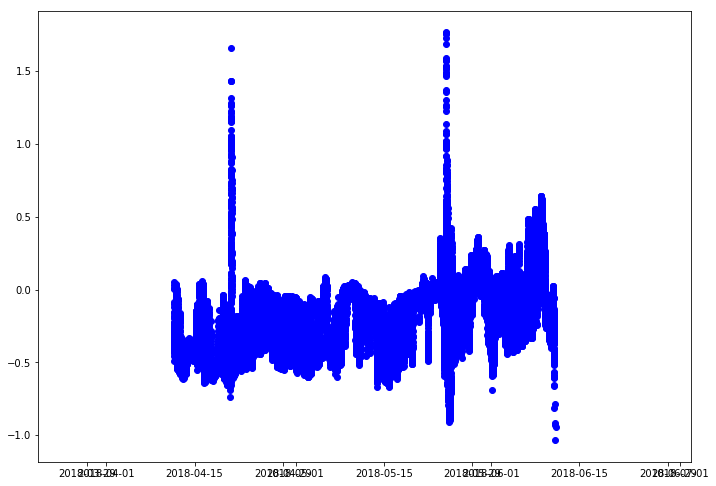

In [5]:

adir_goes='F:/data/cruise_data/saildrone/baja-2018/figs/goes_collocations/'    
#adir_goes='./figs/goes_collocations/'    

print(len(tem_dy_from))
print(len(skin-bulk1),tdim)
print(len(gsst))
mindy=min(tem_date)
maxdy=max(tem_date)
print(maxdy-mindy)
intdy=(maxdy-mindy)/12.
fig = plt.figure(figsize=(11.7,8.3))
ax = plt.subplot(111)
#fig, ax1 = plt.subplots() #figure(2,figsize=(11.7,8.3))
#fig, ax1 = plt.subplots() 
#plt.show()
for i in range(0,12):
    plt.scatter(tem_date,skin-bulk1,c='b', label='Skin - Bulk')
    plt.scatter(tem_date,gsst-273.15-bulk1,c='r', label='GOES - Bulk')
    plt.xlabel('Date')
    plt.ylabel('GOES SST - T$_{ctd}$')
    plt.ylim(-3, 2)
    plt.xlim(mindy+i*intdy,mindy+(i+1)*intdy)
    #plt.show()
    #plt.set_axis_bgcolor("white")
    #plt.legend('Skin - Bulk','GOES - Bulk')
    plt.legend()
    fig_fname=adir_goes+'skinbulk_goes_TS' + str(i) +'.png'
    print(fig_fname)
    #plt.savefig(fig_fname, transparent=False, format='png')
    plt.clf()
